# Tensorflow Binary Classification (From Scratch Model)

Let's look at a simple example: building a model to classify whether an image contains a dog or cat & compare training on augmented vs non-augmented data.

## Data Augmentation

- Increases size of training data available.
- Increases model's ability to generalise.
- Helps prevent overfitting.
- Without cost of collecting more data.

### Imports

In [7]:
import os
import zipfile
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

### Utility Functions

In [8]:
def create_model():
    '''
    Creates a basic CNN with 4 convolutional layers

    Args:
        None
    Output:
        Compiled model (ready for training)
    '''
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(loss='binary_crossentropy',
                    optimizer=RMSprop(learning_rate=1e-4),
                    metrics=['accuracy'])
    
    return model



def plot_loss_acc(history):
    '''
    Plots the training and validation loss and accuracy from a history object
    
    Args:
        history object (model training)
    Output:
        Plot
    '''
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(len(acc))

    plt.plot(epochs, acc, 'bo', label='Training accuracy')
    plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
    plt.title('Training and validation accuracy')

    plt.figure()

    plt.plot(epochs, loss, 'bo', label='Training Loss')
    plt.plot(epochs, val_loss, 'b', label='Validation Loss')
    plt.title('Training and validation loss')
    plt.legend()

    plt.show()

### Data

Ensure data in correct directory structure. Later when we use TesnorFlow's flow_from_directory for data augmentation it requires:
- Base directory
    - Train
        - Cat
        - Dog
    - Validation
        - Cat
        - Dog

In [9]:
# Extract the file
zip_ref = zipfile.ZipFile("./cats_and_dogs_filtered.zip", 'r')
zip_ref.extractall("tmp/")
zip_ref.close()

# Assign training and validation directories
base_dir = 'tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Assign training / testing & cat / dog directories
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

### Set-up Unaugmented Data Generators & Normalise 

In [10]:
# Normalise pixels
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # Directory for training images
        target_size=(150, 150),  # Resize images to 150x150
        batch_size=20,
        class_mode='binary') # binary_crossentropy loss -> binary labels

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


### Baseline Performance

To see the effect of augmentation let's first train a model on the data without augmentation.

In [11]:
# Number of training epochs
EPOCHS = 20

# Create model
model = create_model()

# Train model
history = model.fit(
      train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=EPOCHS,
      validation_data=validation_generator,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=2)

Epoch 1/20


2023-09-21 09:55:37.633318: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]
2023-09-21 09:55:53.573653: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


100/100 - 18s - loss: 0.6856 - accuracy: 0.5445 - val_loss: 0.6711 - val_accuracy: 0.6430 - 18s/epoch - 184ms/step
Epoch 2/20
100/100 - 18s - loss: 0.6517 - accuracy: 0.6205 - val_loss: 0.6220 - val_accuracy: 0.6720 - 18s/epoch - 177ms/step
Epoch 3/20
100/100 - 18s - loss: 0.6007 - accuracy: 0.6840 - val_loss: 0.6014 - val_accuracy: 0.6740 - 18s/epoch - 184ms/step
Epoch 4/20
100/100 - 18s - loss: 0.5620 - accuracy: 0.7105 - val_loss: 0.5728 - val_accuracy: 0.7000 - 18s/epoch - 185ms/step
Epoch 5/20
100/100 - 19s - loss: 0.5326 - accuracy: 0.7240 - val_loss: 0.5681 - val_accuracy: 0.6970 - 19s/epoch - 185ms/step
Epoch 6/20
100/100 - 19s - loss: 0.5055 - accuracy: 0.7515 - val_loss: 0.5497 - val_accuracy: 0.7120 - 19s/epoch - 188ms/step
Epoch 7/20
100/100 - 19s - loss: 0.4728 - accuracy: 0.7775 - val_loss: 0.5426 - val_accuracy: 0.7220 - 19s/epoch - 189ms/step
Epoch 8/20
100/100 - 19s - loss: 0.4588 - accuracy: 0.7835 - val_loss: 0.5363 - val_accuracy: 0.7340 - 19s/epoch - 190ms/step
Epo

let's visualize the loss and accuracy with respect to the training and validation set. This function accepts a [History](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/History) object which contains the results of the `fit()` method ran above.

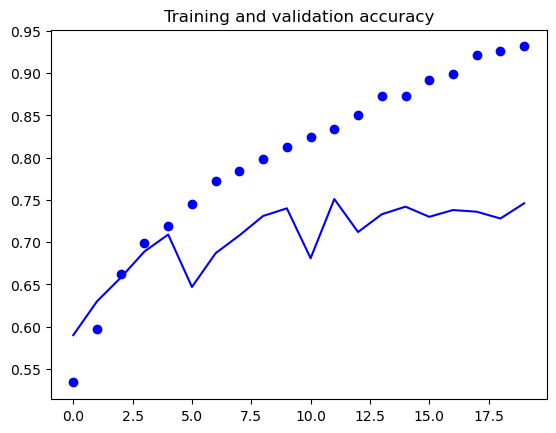

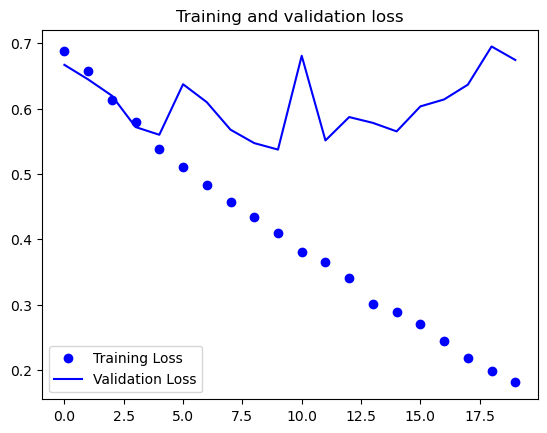

In [8]:
# Plot results
plot_loss_acc(history)

So training accuracy continues to improve as it goes beyond 90%, but validation accuracy stops increasing & fluctuates in 70%-80% range. This is overfitting - the model is good with images it has seen before, but not so well with images it hasn't. This is a result of small training data sizes. Let's see how data augmentation can help...

### Set-up Augmented Data Generators & Normalise 

Let's use data augmentation to enhance our dataset. We apply:
- rotation
- horizontal shift
- vertical shift
- horizontal flip
- shearing
- zoom
- fill (what to do with new pixels created from rotation etc)

Note: we don't augment validation data.

In [12]:
# Augment & normalise train data
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # Directory for training images
        target_size=(150, 150),  # Resize images to 150x150
        batch_size=20,
        class_mode='binary') # binary_crossentropy loss -> binary labels

# Normalise test data
test_datagen = ImageDataGenerator(rescale=1./255)

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


### Model trained on augmented data performance

In [14]:
# Create model
model_for_aug = create_model()

# Train model
history_with_aug = model_for_aug.fit(
      train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=EPOCHS,
      validation_data=validation_generator,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=2)

Epoch 1/20


2023-09-21 10:05:53.910095: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]
2023-09-21 10:06:11.224151: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


100/100 - 20s - loss: 0.6937 - accuracy: 0.5240 - val_loss: 0.6771 - val_accuracy: 0.5580 - 20s/epoch - 199ms/step
Epoch 2/20
100/100 - 19s - loss: 0.6770 - accuracy: 0.5675 - val_loss: 0.6581 - val_accuracy: 0.5940 - 19s/epoch - 191ms/step
Epoch 3/20
100/100 - 19s - loss: 0.6664 - accuracy: 0.6050 - val_loss: 0.6376 - val_accuracy: 0.6440 - 19s/epoch - 191ms/step
Epoch 4/20
100/100 - 18s - loss: 0.6515 - accuracy: 0.6155 - val_loss: 0.6654 - val_accuracy: 0.5780 - 18s/epoch - 183ms/step
Epoch 5/20
100/100 - 18s - loss: 0.6342 - accuracy: 0.6350 - val_loss: 0.5870 - val_accuracy: 0.6840 - 18s/epoch - 184ms/step
Epoch 6/20
100/100 - 18s - loss: 0.6193 - accuracy: 0.6605 - val_loss: 0.5805 - val_accuracy: 0.6860 - 18s/epoch - 185ms/step
Epoch 7/20
100/100 - 19s - loss: 0.6115 - accuracy: 0.6600 - val_loss: 0.6333 - val_accuracy: 0.6280 - 19s/epoch - 192ms/step
Epoch 8/20
100/100 - 20s - loss: 0.6010 - accuracy: 0.6760 - val_loss: 0.5472 - val_accuracy: 0.7230 - 20s/epoch - 196ms/step
Epo

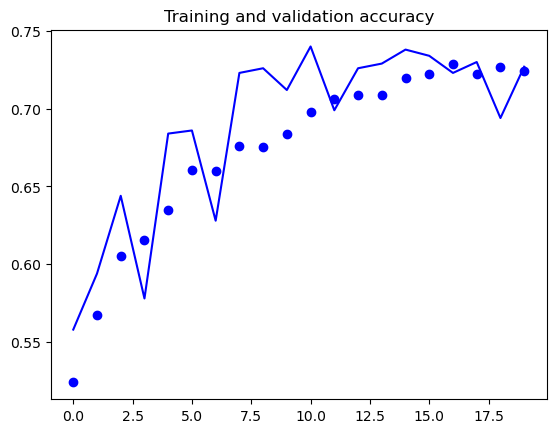

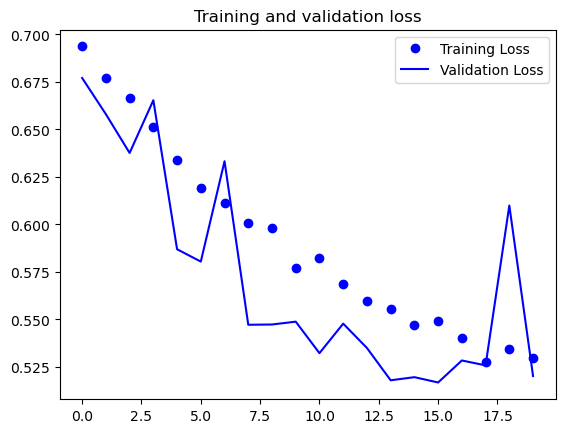

In [16]:
# Plot results of training with data augmentation
plot_loss_acc(history_with_aug)

Interestingly the training accuracy has decreased for the augmented model in comparison to our baseline. A reason for this is that the augmented data has more variety which requires more training epochs to be learnt.

However the good news is that validation accuracy no longer stalls so quickly, as it did on the baseline model. 

In both models the loss and accuracy curves appear jagged, perhaps the result of our relatively small dataset. We could also look to fine tune the learning rate (as seen in my TS Sunspot prediction TensorFlow model).